<a href="https://colab.research.google.com/github/drpedrazas/TAREAS_Aprendizaje_de_Maquina/blob/main/Segundo_Conjunto_de_Problemas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejercicio 1.12

La respuesta es C.

Considero que esta es la respuesta correcta. $g$ jamás va a ser una aproximación perfecta de $f$, pero puede ser bastante fiel; si logramos encontrarle. Caso contrario habremos fallado. Hay que recordar que, dependiendo del problema, existe una posibildiad de que no sea posible encontrar un $g$, o que fallemos encontrándolo. 

## Problema 1.2

Considere el perceptrón en dos dimensiones: $h(x) = signo(w^{T}x)$ donde $w=[w_0,w_1,w_2]^{T}$ y $x=[1,x_1,x_2]^{T}$.

**a)** demuestre que las regiones en el plano tal que $h(x) = +1$ y $h(x) = -1$ están separados por una línea. Si expresamos esta línea como $x_2 = a x_1  + b$, ¿qué es la pendiente $a$ y la intercepción $b$ en términos de $w_0,w_1,w_2$?

**b)** dibuje la imagen para $w=[1,2,3]^T$ y $w = -[1,2,3]^{T}$.

#Solución:

**a)** Si existen dos regiones definidas por $h(x)$, su frontera ha de estar dada por aquellos puntos $x$ tal que $h(x)=0$. Esto es: $w_0 +w_1 x_1 + w_2 x_2 = 0$. Si $w$ ya ha sido encontrado, y es constante, entonces: $$x_2 = -\frac{w_1}{w_2}x_2 - \frac{w_0}{w_2}$$ 

De acá se sigue que: $a = -\frac{w_1}{w_2}$ y $b=- \frac{w_0}{w_2}$.


**b)** Son la misma recta: 
$$y = -\frac{3}{2}x - \frac{1}{2}$$
$$y = -\frac{-3}{-2}x - \frac{-1}{-2}= -\frac{3}{2}x - \frac{1}{2}$$

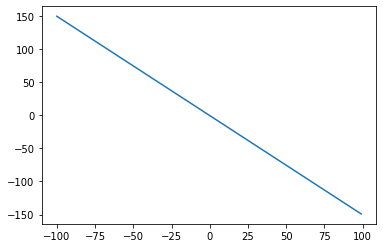

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
recta = lambda x: (-3/2)* x - (1/2)
xs = np.arange(-100,100,1)
fig = plt.figure()
ax = plt.axes()
ax.plot(xs, recta(xs))

##Problema 1.4

En el ejercicio 1.4 usamos un conjunto generado artificialmente para estudiar un perceptrón comp algoritmo de aprendizaje. Estudiaremos el algoritmo con conjuntos de datos de distintos tamaños:

**(a)** genera un conjunto separable de tamaño 20 como se estipula en el ejercicio 1.4. Grafica los ejemplos $\{(x_n,y_n)\}$ así como la función objetivo $f$ en un plano. Asegúrate de marcar los ejemplos para las diferentes clases de forma distinta y agregar etiquetas para los ejes de la gráfica.

**(b)** ejecuta el algoritmo del perceptrón sobre este conjunto y reporta el número de iteraciones necesarias anes e la convergencia. Grafica los ejemplos $\{ (x_n,y_n)\}$, la función objetivo $f$ y la hipótesis $g$ en la misma gráfica. Comenta sobre la proximidad de $f$ a $g$.

**(c)** Repite $(b)$ con otro conjunto generado aleatoriamente de tamaño $20$. Compara tus resultados con $(b)$.

**(d)** Repite todo en $(b)$ con otro conjunto generado aleatoriamente de tamaño $100$.

**(e)** Repite todo en $(b)$ con otro conjunto generado aleatoriamente de tamaño $1000$.

**(f)** modifica el algoritmo para trabajar con $x_n \in \mathbb{R}^{10}$. Genera un conjunto separable de tamaño $1000$ y ejecuta el algoritmo una vez más. ¿Cuántas iteraciones necesitamos para la convergencia?

**(g)** usa el algoritmo en $(f)$ para un conjunto de tamaño $100$. Acá, sin embargo, escogeremos $x(t)$ de forma aleatoria. Grafica un histograma detallando el númro de iteraciones requeridas.

**(h)** resume tus resultados con respecto a la precisión como una función de $N$ y $d$. 

#Solución

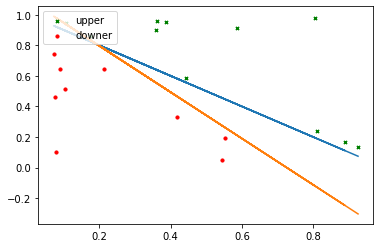

Número de iteraciones:  74


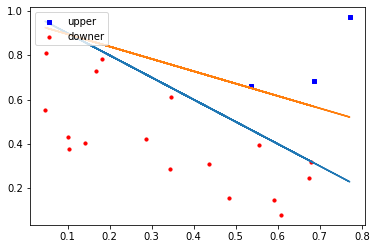

Número de iteraciones:  39


In [ ]:
#(a) y (b)

f = lambda x: -x + 1 # escogemos esta función
region = lambda x: -1 if f(x[1]) >= x[2] else 1

puntos = np.random.rand(20,2)
xs = [np.array([1,x[0],x[1]]) for x in puntos]
w = np.random.randint(10, size = 3) # una elección caprichosa
ys  = {tuple(i): region(i) for i in xs}

'''
Filtremos los elementos que, dada esta elección, son clasificados adecuadamente 
'''

no_clasificado = list(filter(lambda x: np.sign(np.sum(w*x)) != ys[tuple(x)], xs))

iteraciones = 0
while True:
  if len(no_clasificado) == 0:
    break
  iteraciones += 1
  next_x = no_clasificado[-1]
  w = w + ys[tuple(next_x)]*next_x
  no_clasificado = list(filter(lambda x: np.sign(np.sum(w*x)) != ys[tuple(x)], xs))
g = lambda x: -(w[1]/w[2])*x - (w[0]/w[2])

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter([i[1] for i in xs if ys[tuple(i)] == 1], [i[2] for i in xs if ys[tuple(i)] == 1], s=10, c='g', marker="x", label='upper')
ax1.scatter([i[1] for i in xs if ys[tuple(i)] == -1], [i[2] for i in xs if ys[tuple(i)] == -1], s=10, c='r', marker="o", label='downer')
ax1.plot([i[0] for i in puntos], [f(i[0]) for i in puntos])
ax1.plot([i[0] for i in puntos], [g(i[0]) for i in puntos])
plt.legend(loc='upper left');
plt.show()
iteraciones_a =  iteraciones
print("Número de iteraciones: ", iteraciones_a)
iteraciones = 0

# a repetirlo para el punto (c):

puntos = np.random.rand(20,2)
xs = [np.array([1,x[0],x[1]]) for x in puntos]
w = np.random.randint(10, size = 3) # una elección caprichosa
ys  = {tuple(i): region(i) for i in xs}

'''
Filtremos los elementos que, dada esta elección, son clasificados adecuadamente 
'''

no_clasificado = list(filter(lambda x: np.sign(np.sum(w*x)) != ys[tuple(x)], xs))

iteraciones = 0
while True:
  if len(no_clasificado) == 0:
    break
  iteraciones += 1
  next_x = no_clasificado[-1]
  w = w + ys[tuple(next_x)]*next_x
  no_clasificado = list(filter(lambda x: np.sign(np.sum(w*x)) != ys[tuple(x)], xs))
g = lambda x: -(w[1]/w[2])*x - (w[0]/w[2])

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter([i[1] for i in xs if ys[tuple(i)] == 1], [i[2] for i in xs if ys[tuple(i)] == 1], s=10, c='b', marker="s", label='upper')
ax1.scatter([i[1] for i in xs if ys[tuple(i)] == -1], [i[2] for i in xs if ys[tuple(i)] == -1], s=10, c='r', marker="o", label='downer')
ax1.plot([i[0] for i in puntos], [f(i[0]) for i in puntos])
ax1.plot([i[0] for i in puntos], [g(i[0]) for i in puntos])
plt.legend(loc='upper left');
plt.show()
iteraciones_a =  iteraciones
print("Número de iteraciones: ", iteraciones_a)
iteraciones = 0

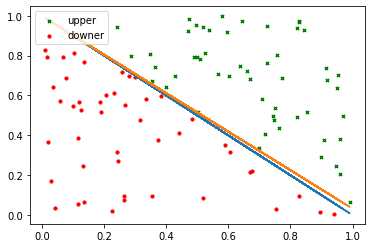

Número de iteraciones:  39


In [ ]:
#(d)
puntos = np.random.rand(100,2)
xs = [np.array([1,x[0],x[1]]) for x in puntos]
w = np.random.randint(10, size = 3) # una elección caprichosa
ys  = {tuple(i): region(i) for i in xs}

'''
Filtremos los elementos que, dada esta elección, son clasificados adecuadamente 
'''

no_clasificado = list(filter(lambda x: np.sign(np.sum(w*x)) != ys[tuple(x)], xs))

iteraciones = 0
while True:
  if len(no_clasificado) == 0:
    break
  iteraciones += 1
  next_x = no_clasificado[-1]
  w = w + ys[tuple(next_x)]*next_x
  no_clasificado = list(filter(lambda x: np.sign(np.sum(w*x)) != ys[tuple(x)], xs))
g = lambda x: -(w[1]/w[2])*x - (w[0]/w[2])

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter([i[1] for i in xs if ys[tuple(i)] == 1], [i[2] for i in xs if ys[tuple(i)] == 1], s=10, c='g', marker="x", label='upper')
ax1.scatter([i[1] for i in xs if ys[tuple(i)] == -1], [i[2] for i in xs if ys[tuple(i)] == -1], s=10, c='r', marker="o", label='downer')
ax1.plot([i[0] for i in puntos], [f(i[0]) for i in puntos])
ax1.plot([i[0] for i in puntos], [g(i[0]) for i in puntos])
plt.legend(loc='upper left');
plt.show()
iteraciones_d =  iteraciones
print("Número de iteraciones: ", iteraciones_a)
iteraciones = 0

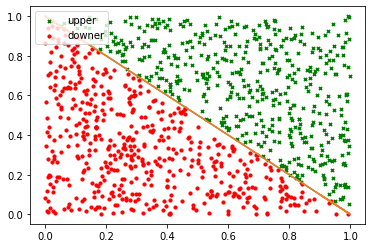

Número de iteraciones:  39


In [ ]:
#(e)
puntos = np.random.rand(1000,2)
xs = [np.array([1,x[0],x[1]]) for x in puntos]
w = np.random.randint(10, size = 3) # una elección caprichosa
ys  = {tuple(i): region(i) for i in xs}

'''
Filtremos los elementos que, dada esta elección, son clasificados adecuadamente 
'''

no_clasificado = list(filter(lambda x: np.sign(np.sum(w*x)) != ys[tuple(x)], xs))

iteraciones = 0
while True:
  if len(no_clasificado) == 0:
    break
  iteraciones += 1
  next_x = no_clasificado[-1]
  w = w + ys[tuple(next_x)]*next_x
  no_clasificado = list(filter(lambda x: np.sign(np.sum(w*x)) != ys[tuple(x)], xs))
g = lambda x: -(w[1]/w[2])*x - (w[0]/w[2])

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter([i[1] for i in xs if ys[tuple(i)] == 1], [i[2] for i in xs if ys[tuple(i)] == 1], s=10, c='g', marker="x", label='upper')
ax1.scatter([i[1] for i in xs if ys[tuple(i)] == -1], [i[2] for i in xs if ys[tuple(i)] == -1], s=10, c='r', marker="o", label='downer')
ax1.plot([i[0] for i in puntos], [f(i[0]) for i in puntos])
ax1.plot([i[0] for i in puntos], [g(i[0]) for i in puntos])
plt.legend(loc='upper left');
plt.show()
iteraciones_e =  iteraciones
print("Número de iteraciones: ", iteraciones_a)
iteraciones = 0

In [125]:
#(f)
import numpy as np
import matplotlib.pyplot as plt

parameters_f = np.random.uniform(-1,1,(1001,)) #Este vector determina nuestro f
puntos = np.array([np.array([1,*np.random.uniform(-1,1,(1000,))]) for x in range(1000)]) #estos son los xs sobre los que trabajaremos
region = lambda x: np.sign(np.sum(x[1:]*parameters_f[1:]) - parameters_f[0]) #esta función nos dice si el punto en cuestión está por encima o por debajo de nuestro objetivo
w = np.random.uniform(-1,1,(1001,)) #los pesos iniciales que queremos optimizar
clasificado = lambda x: np.sign(np.sum(w*x)) == region(x) #esta función nos dice si el punto x ya está clasificado o no
sin_clasificar = np.array([x for x in puntos if not clasificado(x)]) # este es el conjunto de puntos que w no clasifica adecuadamente
iteraciones = 0 #número de iteraciones
while len(sin_clasificar) > 0:
  iteraciones += 1
  next_x = sin_clasificar[-1]
  w = w + region(next_x)*next_x
  sin_clasificar = np.array([x for x in puntos if not clasificado(x)])
print("Número total de iteraciones: ", iteraciones)

Número total de iteraciones:  874


Intento No.0	Intento No.1	Intento No.2	Intento No.3	Intento No.4	Intento No.5	Intento No.6	Intento No.7	Intento No.8	Intento No.9	Intento No.10	Intento No.11	Intento No.12	Intento No.13	Intento No.14	Intento No.15	Intento No.16	Intento No.17	Intento No.18	Intento No.19	Intento No.20	Intento No.21	Intento No.22	Intento No.23	Intento No.24	Intento No.25	Intento No.26	Intento No.27	Intento No.28	Intento No.29	Intento No.30	Intento No.31	Intento No.32	Intento No.33	Intento No.34	Intento No.35	Intento No.36	Intento No.37	Intento No.38	Intento No.39	Intento No.40	Intento No.41	Intento No.42	Intento No.43	Intento No.44	Intento No.45	Intento No.46	Intento No.47	Intento No.48	Intento No.49	Intento No.50	Intento No.51	Intento No.52	Intento No.53	Intento No.54	Intento No.55	Intento No.56	Intento No.57	Intento No.58	Intento No.59	Intento No.60	Intento No.61	Intento No.62	Intento No.63	Intento No.64	Intento No.65	Intento No.66	Intento No.67	Intento No.68	Intento No.69	Intento No.70	Intento No.71	In

<BarContainer object of 100 artists>

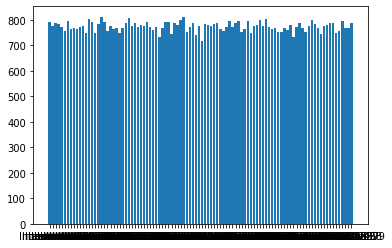

In [142]:
#(g)

#mismos parámetros y mismos puntos; repetido 100 veces y escogiendo el x para corregir w de forma aleatoria

import matplotlib.pyplot as plt
registro = {}
for i in range(100):
  print("Intento No.{}".format(i),end='\t')
  w = np.random.uniform(-1,1,(1001,))
  iteraciones = 0
  sin_clasificar_filtro = ~np.apply_along_axis(clasificado, 1, puntos)
  sin_clasificar = puntos[sin_clasificar_filtro]
  while len(sin_clasificar) > 0:
    iteraciones += 1
    random_n = np.random.randint(0,len(sin_clasificar))
    next_x = sin_clasificar[random_n]
    w = w + region(next_x)*next_x
    sin_clasificar_filtro = ~np.apply_along_axis(clasificado, 1, puntos)
    sin_clasificar = puntos[sin_clasificar_filtro]
  registro["Intento No.{}".format(i)] = iteraciones
keys = registro.keys()
values = registro.values()
plt.bar(keys,values)

**(h)** La dimensión no aumenta significativamente el número de iteraciones, aunque sí incrementa considerablemente el tiempo requerido debido a las operaciones adicionales. $w$ nunca es tan parecido a nuestra función objetivo, pero gráficamene son muy cercanas, al menos en torno a los pundos tomados

##Problema 1.6

Considere una muestra de $10$ canicas tomadas independientemente de una urna con canicas verdes y rojas. La probabilidad de una canica roja es $\mu$. Para $\mu = 0.05$, $\mu = 0.5$, y $\mu=0.8$, compute la probabilidad de que no se tomen canicas rojas $(\nu=0)$.

**(a)** compute la probabilidad si se toma una sola muestra de que $\nu = 0$.

**(b)** compute la probabilidad de que al menos una de las muestras tenga $\nu = 0$ para 1000 muestras.

**(c)** repita **(b)** para $1000000$ muestras.

#Solución
**(a)** Acá basta con usar una distribución binomial. Lo único que hace falta es cambiar los parámetros:

$$P[\nu = 0] = \binom{10}{0} 0.05^{0}(1-0.05)^{10}=0.598$$

$$P[\nu = 0] = \binom{10}{0} 0.5^{0}(1-0.5)^{10}=0.000976$$

$$P[\nu = 0] = \binom{10}{0} 0.8^{0}(1-0.8)^{10}=1.024 \times 10^{-7} $$

**(b)** La selección de cada muestra puede ser vista como un experimento de Bernulli. Para $\mu = 0.05$, $p=0.598$. Sea $v$ el número de veces que $\nu = 0$ en estas muestras. Procedemos así: 

$$P[v > 0] = 1 - \binom{1000}{0} p^{0}(1-p)^{1000} = 0.999... \text{ (muy cercano a uno)}$$

Para $\mu = 0.5$, $p=0.000976$:

$$P[v > 0] = 1 - \binom{1000}{0} p^{0}(1-p)^{1000} = 0.62$$

Para $\mu = 0.8$, $p=1.024 \times 10^{-7}$:

$$P[v > 0] = 1 - \binom{1000}{0} p^{0}(1-p)^{1000} = 0.0001023$$

**(c)** De nuevo. Para $\mu = 0.05$, $p=0.598$:

$$P[v > 0] = 1 - \binom{1000000}{0} p^{0}(1-p)^{1000000} = 0.999... \text{ (muy cercano a uno)}$$

Para $\mu = 0.5$, $p=0.000976$:

$$P[v > 0] = 1 - \binom{1000000}{0} p^{0}(1-p)^{1000000} = 0.999... \text{ (muy cercano a uno)}$$

Para $\mu = 0.8$, $p=1.024 \times 10^{-7}$:

$$P[v > 0] = 1 - \binom{1000000}{0} p^{0}(1-p)^{1000000} = 0.097$$

##Problema 1.9

En este problema derivamos una fomra de la ley de los grandes números con una cota exponencial, llamada cota de Chernoff. Nos concentramosen el caso sencillo de lanzar una moneda, y utuilizar una aproximación similar a la del problema 1.8.

**(a)** Sea $t$ una variable aleatoria finita, $\alpha$ una constante positiva, y $s$ un parámetro positivo. Si $T(s) = \mathbb{E}_{t}(e^{st})$, muestre que:

$$P[t>\alpha] \leq e^{-s\alpha} T(s)$$

**(b)** Sean $u_1 \cdots u_N$ variables aleatoreas iid, y sea $u=\frac{1}{N}\sum_{n=1}^{N} u_n$. Si $U(s) = \mathbb{E}_{u_n}(e^{su_n})$ (para cualqueir n), prueve que

$$P[u \geq \alpha] = (e^{-s\alpha}U(s))^N$$

**(c)** Suponga $P[u_n=0]=P[u_n=1]=\frac{1}{2}$ (una moneda justa). Evalúe $U(s)$ como una función de $s$, y minimice $e^{-s\alpha}U(s)$ con respecto a $s$ con $\alpha$ fijo, $0<\alpha< 1$.

**(d)** Concluya en **(c)** que, para $0 < \epsilon < 1$ 

$$P[u \geq \mathbb{E}(u) + \epsilon] \leq 2^{-\beta N}$$

donde $\beta = 1+(\frac{1}{2} + \epsilon)\log_{2}(\frac{1}{2} + \epsilon)+ (\frac{1}{2} - \epsilon)\log_{2}(\frac{1}{2} - \epsilon)$ y $\mathbb{E}(u) = \frac{1}{2}$. Muestre que $\beta>0$, luego el la cota es exponencialmente decreciente con respecto a $N$. 

#Solución

**(a)** Suponga que $t$ es discreta. De ser así, y si $t$ es finta, existe $u$ tal que $P[t>u] = 0$. Esuma también que existe un $u'$ tal que $P[t<u']=0$.

Sabemos que $\mathbb{E}_{t}(e^{st}) = \sum_{i = u'}^{u} e^{si}P[t=i]$. Esto es:

$$\mathbb{E}_{t}(e^{st}) = \sum_{i = u'}^{u} e^{si}P[t=i]=\sum_{i = u'}^{\alpha-1} e^{si}P[t=i] + \sum_{i = \alpha}^{u} e^{si}P[t=i]$$

Sea $\sum_{i = u'}^{\alpha-1} e^{si}P[t=i]=C$.

$$\mathbb{E}_{t}(e^{st})= C + \sum_{i = \alpha}^{u} e^{si}P[t=i]$$

Note que  

$$\sum_{i = \alpha}^{u} e^{si}P[t=i]=e^{s\alpha}P[t=\alpha]+e^{s(\alpha+1)}P[t=\alpha+1] + \cdots + e^{su}P[t=u]$$

Como $e^{st}$ es una función creciente:

$$\sum_{i = \alpha}^{u} e^{si}P[t=i] \geq e^{s\alpha}P[t=\alpha]+e^{s\alpha}P[t=\alpha+1] + \cdots + e^{s\alpha}P[t=u]$$
Es decir:

$$\sum_{i = \alpha}^{u} e^{si}P[t=i] \geq e^{s\alpha} P[t \geq \alpha]$$

Claramente: 

$$C+\sum_{i = \alpha}^{u} e^{si}P[t=i] \geq e^{s\alpha} P[t \geq \alpha]$$

$$\mathbb{E}_{t}(e^{st}) \geq e^{s\alpha} P[t \geq \alpha]$$
$$T(s) \geq e^{s\alpha} P[t \geq \alpha]$$
$$e^{-s\alpha} T(s) \geq P[t\geq\alpha]$$
Concluimos entonces:
$$P[t\geq\alpha] \leq e^{-s\alpha} T(s)$$
**el caso continuo es análogo, pero definimos $T(s) = \int_{u'}^u e^{st}p(t)dt$**.

**(b)**

Tome $t = N\mu$. De acuerdo a lo que acabamos de probar:

$$P[N\mu \geq N\alpha] \leq e^{-sN\alpha}\mathbb{E}_{N\mu}(e^{sN\mu})$$

$$P[\mu \geq \alpha] \leq e^{-sN\alpha}\mathbb{E}_{N\mu}(\Pi_{i \leq N} e^{su_i})$$

$$P[\mu \geq \alpha] \leq e^{-sN\alpha} \Pi_{i \leq N} \mathbb{E}_{u_i}( e^{su_i})$$

$$P[\mu \geq \alpha] \leq e^{-sN\alpha} U(s)^{N}$$

$$P[\mu \geq \alpha] \leq (e^{-s\alpha} U(s))^{N}$$

**(c)** En este caso $U(s) = \frac{e^{s}}{2} + \frac{1}{2}$. Por esto: 

$$e^{-\alpha s}U(s) = \frac{e^{s(1-\alpha)}}{2} + \frac{e^{-\alpha s}}{2}$$

Derivamos con respecto a $s$ e igualamos a $0$:

$$(1-\alpha)\frac{e^{s(1-\alpha)}}{2} - \alpha\frac{e^{-\alpha s}}{2}=0$$

$$\frac{e^{s(1-\alpha)}}{e^{s\alpha}} = \frac{\alpha}{1-\alpha}$$

$$e^{s} = \frac{\alpha}{1-\alpha}$$

Por lo tanto:

$$s = \ln(\frac{\alpha}{1-\alpha})$$

**(d)**
Tome $s = \ln(\frac{\alpha}{1-\alpha})$

$$e^{-s\alpha}U(s) = \frac{e^{s(1-\alpha)}}{2} + \frac{e^{-\alpha s}}{2}$$

$$e^{-s\alpha}U(s) = \frac{e^{\ln(\frac{\alpha}{1-\alpha})(1-\alpha)}}{2} + \frac{e^{-\alpha \ln(\frac{\alpha}{1-\alpha})}}{2}$$

$$e^{-s\alpha}U(s) = \frac{\frac{\alpha}{1-\alpha}e^{(1-\alpha)}}{2} + \frac{\frac{\alpha}{1-\alpha}e^{-\alpha }}{2}$$

Si $\alpha = \mathbb{E}(u) + \epsilon = \frac{1}{2} + \epsilon$

$$e^{-s(\frac{1}{2} + \epsilon)}U(s) = \frac{\frac{\frac{1}{2} + \epsilon}{1-(\frac{1}{2} + \epsilon)}e^{(1-(\frac{1}{2} + \epsilon))}}{2} + \frac{\frac{\alpha}{1-(\frac{1}{2} + \epsilon)}e^{-(\frac{1}{2} + \epsilon) }}{2}$$

$$e^{-s\alpha}U(s) = \frac{1}{2}(\frac{1}{2}-\epsilon)^{-(\frac{1}{2}-\epsilon)}(\frac{1}{2}+\epsilon)^{-(\frac{1}{2}+\epsilon)}$$

$$e^{-s\alpha}U(s) = 2^{\log_{2} (\frac{1}{2}(\frac{1}{2}-\epsilon)^{-(\frac{1}{2}-\epsilon)}(\frac{1}{2}+\epsilon)^{-(\frac{1}{2}+\epsilon)})}$$

Note que $\log_{2}(\frac{1}{2}(\frac{1}{2}-\epsilon)^{-(\frac{1}{2}-\epsilon)}(\frac{1}{2}+\epsilon)^{-(\frac{1}{2}+\epsilon)}) = -1-(\frac{1}{2} + \epsilon)\log_{2}(\frac{1}{2} + \epsilon)-(\frac{1}{2} - \epsilon)\log_{2}(\frac{1}{2} - \epsilon)$

Luego:

$$e^{-s\alpha}U(s)  = 2^{-\beta}$$

Se obtiene fácilmente que:

$$P[u \geq \mathbb{u} + \epsilon] \leq 2^{-\beta N}$$


##Problema 1.12

**(a)** Basta con minimizar $\mathbb{E}_{in}(h)$ con respecto a $h$. Esto es:

$$ \frac{d}{dh}(\mathbb{E}_{in}(h))=0$$
$$2\sum_{n=1}^{N}(h-y_n)=0$$
$$\sum_{n=1}^{N}(h-y_n)=0$$
$$\sum_{n=1}^{N}h=\sum_{n=1}^{N}y_n$$
$$h_{mean}=\frac{1}{N}\sum_{n=1}^{N}y_n$$

**(b)**  Acá usamos el mismo artificio:

$$ \frac{d}{dh}(\mathbb{E}_{in}(h))=0$$
$$\sum_{n=1}^{N}signo(h-y_n)=0$$

Para la mediana, hay tantos puntos por encima de ella como por debajo, por lo que esta suma es siemrpe $0$ para este valor.

**(c)** $h_{mean}$ cambia, como hemos visto en **(a)**, puesto que depende de los $y_i$. $h_{med}$ queda igual siempre que $h_{med} < y_N$.
